<a href="https://colab.research.google.com/github/sanamehrabbeigi/Deep-Learning-Course/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW4: Face Detection and Bias


<div dir='rtl'style="text-align: right;font-family:verdana;">

در این تکلیف هدف طراحی مدلی بر اساس شبکه‌های CNN
برای حل یک مساله‌ی دسته‌بندی دو کلاسه و تاثیر بایاس بر روی این مساله است.
دیتاستی از تصاویر چهره و غیرچهره در اختیار شما قرار داده شده است. دیتاست اول
([CelebA Dataset](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html))
 که شامل چهره‌ی افراد مشهور بوده٫ در مجموع شامل بیش از 200k
تصویر می‌باشد.
همچنین دیتاست دوم شامل تصاویر غیرچهره از دیتاست
 [ImageNet](http://www.image-net.org/)
می‌باشد.
شبکه‌ی طراحی شده باید بتواند تشخیص دهد که تصویر ورودی متعلق به کدام یک از این دو دسته می‌باشد
 و همچنین بایاس شبکه مورد بررسی قرار می‌گیرد.
  بایاس در شبکه‌های عصبی از اهمیت زیادی برخوردار است زیرا تشخیص چهره توسط شبکه آسان است اما تشخیص چهره بر اساس جنسیت و رنگ پوست مهم و وابسته به بایاس دار نبودن شبکه است. بایاس به دلیل عدم تعادل در داده‌های آموزشی رخ می‌دهد و شبکه به نوع خاصی از داده‌ها فیت می‌شود و آن را به عنوان ویژگی اصلی در شبکه در نظر می‌گیرد. شما می‌باید بایاس دار بودن شبکه‌ی خود را مورد بررسی و تحلیل قرار دهید. برای آشنایی بیشتر در مورد بایاس در شبکه‌های عصبی ویدیویی که در ادامه در اختیار شما قرار داده شده است را مشاهده کنید.

 کد اولیه تشخیص چهره توسط شبکه‌های CNN در اختیار شما قرار داده شده است٫ شما موظف هستید قسمت‌هایی که با TODO
نشان داده شده است را به بهترین نحو کامل کنید تا دقت در شبکه‌ی طراحی شده به بالاترین مقدار برسد. همچنین مقادیر مناسب برای هایپرپارامترهای شبکه را بیابید.

<div dir='rtl'style="text-align: right;font-family:verdana;">

تاثیر موارد زیر را بر عملکرد مدلی که طراحی کرده‌اید بررسی و تحلیل کنید:


*   تعداد لایه‌های کانولوشنی = 6 و Fully Connected = 3
*   تعداد فیلترها و نورون‌های هر لایه
* نرخ یادگیری = 1e-5 و batch size = 16
* توابع بهینه‌ساز = BatchNormalization , Dropout (برای منظم سازی)

<div dir='rtl'style="text-align: right;font-family:verdana;">

در این تکلیف از پکیج deeplearningcourse
که در اختیار شما قرار داده شده است٫ استفاده شده است. در مورد استفاده از پکیج مورد نظر به موارد زیر توجه کنید.


*   پکیج deeplearningcourse را در فولدر اصلی google drive خود ذخیره کنید.
*   کد داده شده را از ابتدا اجرا کنید تا به error برخورید.
* از قسمت Runtime/Restart runtime را اجرا کنید.
* دوباره از ابتدا شروع به اجرا برنامه کنید. حال پکیج مورد نظر شناخته شده است و می‌توانید از آن استفاده کنید.
* در صورت استفاده از google colab برای اجرای سریع‌تر برنامه می‌توانید در قسمت
Runtime/change runtime type
حالت GPU را انتخاب کنید.



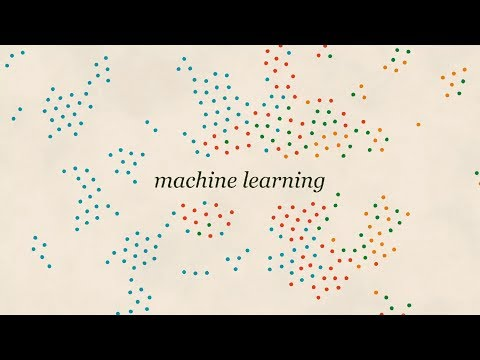

In [ ]:
import IPython
IPython.display.YouTubeVideo('59bMh59JQDo')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

import IPython
import functools
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

!pip install -e /content/drive/MyDrive/colab/HW4_DL/deeplearningcourse
import deeplearningcourse as dlc

Obtaining file:///content/drive/MyDrive/colab/HW4_DL/deeplearningcourse
  Attempting uninstall: deeplearningcourse
    Found existing installation: deeplearningcourse 0.0.0
    Can't uninstall 'deeplearningcourse'. No files were found to uninstall.
  Running setup.py develop for deeplearningcourse


## 2.1 Datasets

In [ ]:
path = tf.keras.utils.get_file('train_face.h5', 'https://www.dropbox.com/s/hlz8atheyozp1yx/train_face.h5?dl=1')
Train_loader = dlc.P2.TrainingDatasetLoader(path)

1263902720/1263889489 [==============================] - 53s 0us/step
Opening /root/.keras/datasets/train_face.h5
Loading data into memory...


In [ ]:
training_examples = Train_loader.get_train_size()
(train_X, train_Y) = Train_loader.batch_geting(100)

<div dir='rtl'style="text-align: right;font-family:verdana;">

برای مشاهده‌ی تصاویر چهره و غیرچهره موجود در دیتاست‌ها می‌توانید ایندکس‌های زیر را تغییر دهید و تصاویر را مشاهده کنید.

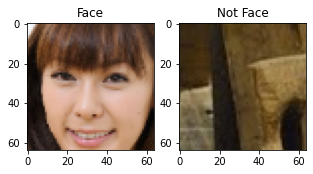

In [ ]:
# visualizing training dataset
face = train_X[np.where(train_Y==1)[0]]
not_face = train_X[np.where(train_Y==0)[0]]

idex_face = 43
idex_not_face = 7

plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.imshow(face[idex_face])
plt.title("Face");

plt.subplot(1, 2, 2)
plt.imshow(not_face[idex_not_face])
plt.title("Not Face");

## 2.2 CNN for face detection


<div dir='rtl'style="text-align: right;font-family:verdana;">

برای حل مساله‌ی تشخیص چهره شما باید یک شبکه‌ی CNN
طراحی کنید.
در ابتدا٫ معماری شبکه به دلخواه خود انتخاب کرده و در ادامه آن را طوری تغییر دهید که بالاترین دقت ممکن حاصل شود.
همانطور که در درس و تمرین سوم بیان شد شبکه CNN
از تعدادی لایه‌ ‌کانولوشنی جهت استخراج ویژگی‌ها و
batch normalization
جهت نرمال سازی داده‌ها در هر لایه استفاده می‌شود.
 و در انتها لایه‌های Fully connected
جهت کلاس بندی داده‌ها یا به عبارت دیگر تطبیق ابعاد خروجی لایه‌های کانولوشنی با خروجی شبکه مورد استفاده قرار می‌گیرد.
در این قسمت شما موظف هستید تاثیر تغییر تعداد لایه‌ها و فیلترها و سایز فیلترها را مورد بررسی قرار دهید و شبکه خود را آموزش دهید و نمودار خطا و دقت شبکه را طی فرایند آموزش بدست آورده و تحلیل کنید.

In [ ]:
# CNN Model

def make_model():
  model = tf.keras.models.Sequential([
                                        tf.keras.layers.Conv2D(16,(3,3),input_shape=(64,64,3),activation='relu',padding='same'),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(16,(3,3),activation='relu',padding='same'),
                                        tf.keras.layers.MaxPool2D(),
                                        tf.keras.layers.Dropout(0.5),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                                        tf.keras.layers.MaxPool2D(),
                                        tf.keras.layers.Dropout(0.5),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                                        tf.keras.layers.MaxPool2D(),
                                        tf.keras.layers.Dropout(0.7),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                                        tf.keras.layers.MaxPool2D(),
                                        tf.keras.layers.Dropout(0.4),
                                        tf.keras.layers.BatchNormalization(),
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                                        tf.keras.layers.MaxPool2D(),
                                        tf.keras.layers.Dropout(0.3),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(512),
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.Dense(128),
                                        tf.keras.layers.Dense(1,activation='sigmoid'),
                                        ])
  return model

classifier = make_model()
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       6

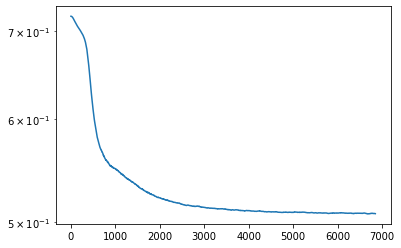

100%|██████████| 429/429 [00:41<00:00, 10.27it/s]


first loss: 0.7189781069755554
last loss: 0.50766921043396


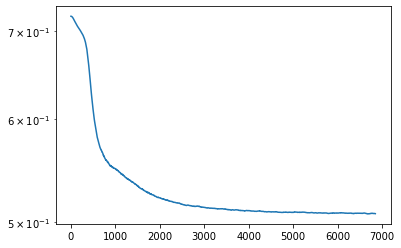

In [ ]:
# Train the model

# hyperparameters
batch_size = 256
epochs = 16
lr = 1e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

loss_history = dlc.P4.LossHistory(smoothing_factor=0.99)
plotter = dlc.P4.PeriodicPlotter(sec=2, scale='semilogy')
if hasattr(tqdm, '_instances'): tqdm._instances.clear()

@tf.function
def train_step(x_train, y_train):
  with tf.GradientTape() as tape:
    logits = classifier(x_train) # Load the images
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(y_train,logits))

  # Backpropagation
  grads_bp = tape.gradient(loss, classifier.trainable_variables)
  optimizer.apply_gradients(zip(grads_bp, classifier.trainable_variables))
  return loss

  # training
for epoch in range(epochs):
  for idx in tqdm(range(Train_loader.get_train_size()//batch_size)):
      # Choosing a batch of training
      x_train, y_train = Train_loader.batch_geting(batch_size)
      loss = train_step(x_train,y_train)

      # Record the loss function
      loss_history.append(loss)
      plotter.plot(loss_history.get())

print(f"first loss: {loss_history.get()[0]}")
print(f"last loss: {loss_history.get()[-1]}")

### Evaluating performance



In [ ]:
# Evaluate your model
#TODO
size = 0
predicted_true = 0

for idx in tqdm(range(Train_loader.get_train_size()//1024)):
  x_test, y_test = Train_loader.batch_geting(1024)
  y_guess = classifier(x_test,training=False)
  for i in range(len(y_test)):
    size+=1
    if(abs(float(y_guess[i])-float(y_test[i]))<0.5):
      predicted_true+=1

print(f"Size: {size}")
print(f"Predicted correctly: {predicted_true}")
print(f"Accuracy: {(predicted_true/size)*100:.4}%")

100%|██████████| 107/107 [01:20<00:00,  1.33it/s]

Size: 109568
Predicted correctly: 108612
Accuracy: 99.13%


<div dir='rtl'style="text-align: right;font-family:verdana;">

در قسمت بعدی به بررسی عملکرد شبکه‌ای که طراحی کرده‌اید بر روی داده‌های تست بپردازید. داده‌های تست شامل تصاویر چهره با چهار نوع دسته‌بندی براساس جنست و رنگ پوست افراد است:
خانم سفید پوست٫ خانم سیاه پوست٫ اقای سفید پوست٫ و اقای سیاه پوست.

خروجی حاصل اعمال الگوریتم تشخیص چهره بر روی تصاویر تست که به عنوان ورودی به شبکه‌ی خود داده‌اید را مورد تحلیل و بررسی قرار دهید (میزان دقت را برای هر دسته جداگانه بدست آورید) و بیان کنید آیا شبکه دارای بایاس می‌باشد یا خیر؟ اگر دارای بایاس می‌باشد دلیل آن چیست؟ همچنین اگر شبکه طراحی شده دارای بایاس می‌باشد راه حلی برای رفع این مشکل پیشنهاد کنید.

بله دارای بایاس نسبت به آقایان است و علت آن می تواند این باشد که عکس از آقایان بیشتر در دیتاست ما قرار دارد و البته با تفاوت کمی عکس های افراد سفید پوست را بهتر از افردا سیاه پوست تشخیص می دهد که علت آن هم میتواند کمتر مشخص بودن اجزا صورت در سیاه پوستان و یا دیتای کمتری داشتن از آن ها باشد که این مشکلات را می توان با افزایش دیتا در جهت آنکه از هر 4نوع عکس به تعداد مساوی و شکل های متفاوت داشته باشیم.

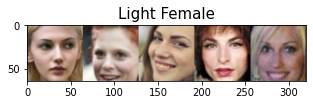

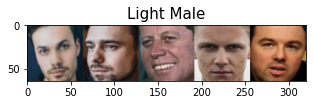

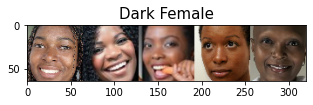

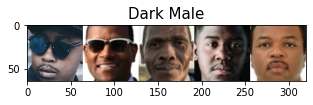

In [ ]:
#Load test dataset

faces_test = dlc.P2.get_testing_face()
heads = ["Light Female", "Light Male", "Dark Female", "Dark Male"]
for group, head in zip(faces_test,heads):
  plt.figure(figsize=(5,5))
  plt.imshow(np.hstack(group))
  plt.title(head, fontsize=15)

Text(0.5, 1.0, 'classifier prediction')

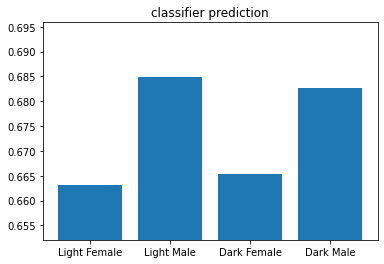

In [ ]:
#Evaluate the CNN network on the test dataset per demographic
logits_classifier = [classifier(np.array(x,dtype = np.float32)) for x in faces_test]
probs_classifier = tf.squeeze(tf.sigmoid(logits_classifier))
#TODO
x_probs = range(len(heads))
y_probs = probs_classifier.numpy().mean(1)
plt.bar(x_probs, y_probs)
plt.xticks(x_probs, heads)
plt.ylim(max(0,y_probs.min()-y_probs.ptp()/2.), y_probs.max()+y_probs.ptp()/2.)
plt.title("classifier prediction")